# Pandas Intro

https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html

https://pandas.pydata.org/docs/user_guide/index.html

* [Core data structures](#Core-data-structures)
 * [Series](#Series)
 * [DataFrame](#DataFrame)
   * [Create with](#DataFrame)
   * [Basic attributes](#Basic-attributes)
   * [Indexing](#Indexing)
* [Basics](#Basics)
  * [Quick exploration](#Basics)
  * Merge, join, and concatenate: [see docs](http://pandas.pydata.org/pandas-docs/stable/merging.html#merge-join-and-concatenate)
  * Grouping: [see docs](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

Setting things up:

In [1]:
from IPython.display import display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# pretty printer
import pprint
pp = pprint.PrettyPrinter(indent=2).pprint

%matplotlib inline

print("Pandas version:", pd.__version__)

Pandas version: 1.0.3


## Jupyter display options

https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html#overview

In [ ]:
print(pd.options.display.max_rows)
print(pd.options.display.precision)
# pd.set_option('display.max_rows', 500)
pd.set_option('precision', 4)

60
6


In [ ]:
# to print a whole DF regardless of size:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(df)

## Core data structures

The point of the core data strctures is to maintain the associations between values and labesl in all circumstances. Otherwise we could just use ndarray's directly.

### Series

A series is like a 1D ndarray but with labels (called *index* in Pandas).
The default index is `RangeIndex(len(data))` if not specified.

#### Create with

`pandas.Series(data, index=RangeIndex(len(data)), dtype=None, copy=False))`

* `data` - array-like - your data
* `index` - array-like or Index - default RangeIndex(len(data))
* `dtype` - by default is inferred
* `copy` - whether to copy the data (otherwise it is like a view on it - aka. **original numpy array also gets modified if we change the Series** *until* **we enlarge a series, when a new objectis allocated and correspondence gets broken**)


In [ ]:
# from array-like
s1 = pd.Series([1,3,5,np.nan,6,8])
s1

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [ ]:
# from dict
d = {'a' : 0., 'b' : 1., 'c' : 2.}

print("from", d)
print("\nwith deduced index:")
pp(pd.Series(d))

index = ['b', 'c', 'd', 'a']
print("\nwith explicit index", index, ":")
pp(pd.Series(d, index))

from {'a': 0.0, 'b': 1.0, 'c': 2.0}

with deduced index:
a    0.0
b    1.0
c    2.0
dtype: float64

with explicit index ['b', 'c', 'd', 'a'] :
b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64


In [ ]:
# date_range is kind of like np.arange and np.linspace
# but for making dates indexes
# this gets six days starting from 2013-01-02
# (freq='D' means "day" and is actually the default)
pd.date_range('2013-01-02', periods=6, freq='D')

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
               '2013-01-06', '2013-01-07'],
              dtype='datetime64[ns]', freq='D')

**On missing data:** one can use `np.nan` or `None` or `float('nan')` to denote missing/unknown data.

### DataFrame

2D data structure with labeled axes.
Like a **dict of Series objects with a common rows index and an extra columns index**, or like a **matrix in which Series objects are the columns.** Can be heterogeneous (each series/column can have a different type).

#### Create with

`DataFrame(data=None, index=np.arange(n), columns=np.arange(n), dtype=None, copy=False)`

* `data` - can be:
  * array-like
  * Series
  * dict of series or array-like objects

In [ ]:
# create DF from array-like matrix
dates_index = pd.date_range('2013-01-02', periods=4)
df = pd.DataFrame(np.random.randn(4,5), index=dates_index, columns=list('ABCDE'))
display(df)
df.dtypes

,A,B,C,D,E
2013-01-02,-0.6125,1.1540,0.2136,-1.4168,0.0158
2013-01-03,-0.5623,-0.1566,2.4860,-0.6973,-1.7180
2013-01-04,-1.5178,0.0654,0.2465,0.8707,-0.6513
2013-01-05,-1.7010,0.9693,0.9338,-0.0749,0.6334


A    float64
B    float64
C    float64
D    float64
E    float64
dtype: object

In [ ]:
# create DF from dict
df = pd.DataFrame({ 'A' : 1.,
               'B' : pd.Timestamp('20130102'),
               'C' : pd.Series(1,index=dates_index,dtype='float32'),
               'D' : np.array([3] * 4,dtype='int32'),
               'E' : pd.Categorical(["test","train",None,"train"]),
               'F' : 'foo' },
             dates_index)
display(df)
pp(df.dtypes)
df = df.convert_dtypes()
display(df)
df.dtypes

,A,B,C,D,E,F
2013-01-02,1.0,2013-01-02,1.0,3,test,foo
2013-01-03,1.0,2013-01-02,1.0,3,train,foo
2013-01-04,1.0,2013-01-02,1.0,3,NaN,foo
2013-01-05,1.0,2013-01-02,1.0,3,train,foo


A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


,A,B,C,D,E,F
2013-01-02,1,2013-01-02,1,3,test,foo
2013-01-03,1,2013-01-02,1,3,train,foo
2013-01-04,1,2013-01-02,1,3,NaN,foo
2013-01-05,1,2013-01-02,1,3,train,foo


A             Int64
B    datetime64[ns]
C             Int64
D             Int32
E          category
F            string
dtype: object

#### Basic attributes

*  `df.shape`
* `.index`
* `.columns`
* `.values` (not assignable!)
* `.T` - transposed version

#### Quickly investigate a DataFrame
- head(), tail()
- info()
- describe()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2013-01-02 to 2013-01-05
Freq: D
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       4 non-null      Int64         
 1   B       4 non-null      datetime64[ns]
 2   C       4 non-null      Int64         
 3   D       4 non-null      Int32         
 4   E       3 non-null      category      
 5   F       4 non-null      string        
dtypes: Int32(1), Int64(2), category(1), datetime64[ns](1), string(1)
memory usage: 448.0 bytes


## Basics

### Quick exploration

In [ ]:
dfx = pd.DataFrame(np.random.randn(4,5), index=dates_index, columns=list('ABCDE'))
dfx

,A,B,C,D,E
2013-01-02,1.4579,-0.3821,-0.3236,0.5403,1.5304
2013-01-03,0.7797,-0.1382,-0.7608,0.2731,-2.3677
2013-01-04,1.0577,-1.8611,-0.5368,-0.8439,-0.9164
2013-01-05,-0.9323,0.4947,-0.1097,-0.5048,-0.2617


In [ ]:
dfx.head(2) # default shows first 2

,A,B,C,D,E
2013-01-02,1.4579,-0.3821,-0.3236,0.5403,1.5304
2013-01-03,0.7797,-0.1382,-0.7608,0.2731,-2.3677


In [ ]:
dfx.tail(3)

,A,B,C,D,E
2013-01-03,0.7797,-0.1382,-0.7608,0.2731,-2.3677
2013-01-04,1.0577,-1.8611,-0.5368,-0.8439,-0.9164
2013-01-05,-0.9323,0.4947,-0.1097,-0.5048,-0.2617


In [ ]:
dfx.describe()

,A,B,C,D,E
count,4.0000,4.0000,4.0000,4.0000,4.0000
mean,0.5907,-0.4717,-0.4327,-0.1338,-0.5038
std,1.0529,0.9973,0.2797,0.6485,1.6166
min,-0.9323,-1.8611,-0.7608,-0.8439,-2.3677
25%,0.3517,-0.7518,-0.5928,-0.5896,-1.2792
50%,0.9187,-0.2601,-0.4302,-0.1158,-0.5890
75%,1.1577,0.0201,-0.2701,0.3399,0.1863
max,1.4579,0.4947,-0.1097,0.5403,1.5304


In [ ]:
dfx.iloc[2]

A    1.0577
B   -1.8611
C   -0.5368
D   -0.8439
E   -0.9164
Name: 2013-01-04 00:00:00, dtype: float64

In [ ]:
dfx['B'].iloc[1:3] = 1
pp(dfx)
dfx.mode()

                 A       B       C       D       E
2013-01-02  1.4579 -0.3821 -0.3236  0.5403  1.5304
2013-01-03  0.7797  1.0000 -0.7608  0.2731 -2.3677
2013-01-04  1.0577  1.0000 -0.5368 -0.8439 -0.9164
2013-01-05 -0.9323  0.4947 -0.1097 -0.5048 -0.2617


,A,B,C,D,E
0,-0.9323,1.0,-0.7608,-0.8439,-2.3677
1,0.7797,NaN,-0.5368,-0.5048,-0.9164
2,1.0577,NaN,-0.3236,0.2731,-0.2617
3,1.4579,NaN,-0.1097,0.5403,1.5304


## Ingesting external data

### Simple/default case

In [ ]:
titanic = pd.read_csv("data/titanic.csv").convert_dtypes()
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,<NA>,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,<NA>,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,<NA>,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,<NA>,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,<NA>,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    Int64  
 1   Survived     891 non-null    Int64  
 2   Pclass       891 non-null    Int64  
 3   Name         891 non-null    string 
 4   Sex          891 non-null    string 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    Int64  
 7   Parch        891 non-null    Int64  
 8   Ticket       891 non-null    string 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    string 
 11  Embarked     889 non-null    string 
dtypes: Int64(5), float64(2), string(5)
memory usage: 88.0 KB


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0000,891.0000,891.0000,714.0000,891.0000,891.0000,891.0000
mean,446.0000,0.3838,2.3086,29.6991,0.5230,0.3816,32.2042
std,257.3538,0.4866,0.8361,14.5265,1.1027,0.8061,49.6934
min,1.0000,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,223.5000,0.0000,2.0000,20.1250,0.0000,0.0000,7.9104
50%,446.0000,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,668.5000,1.0000,3.0000,38.0000,1.0000,0.0000,31.0000
max,891.0000,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


In [ ]:
titanic.to_excel('data/titanic.xlsx', sheet_name='passengers', index=False)

In [ ]:
titanic2 = pd.read_excel('data/titanic.xlsx', sheet_name='passengers')

In [ ]:
titanic2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### With index column and dates

In [ ]:
air_quality = pd.read_csv(
    "data/air_quality_no2.csv",
    index_col=0, parse_dates=True
)
pp(air_quality.info())
air_quality.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1035 entries, 2019-05-07 02:00:00 to 2019-06-21 02:00:00
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   station_antwerp  95 non-null     float64
 1   station_paris    1004 non-null   float64
 2   station_london   969 non-null    float64
dtypes: float64(3)
memory usage: 32.3 KB
None


,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


## Indexing

* by column labels:
  * `df['B']`
  * `df[['B', 'E']]`
* by row labels:
  * `df.loc['2013-01-03']`  
  * `df.loc['2013-01-03':'2013-01-05']` (this also works: `df['2013-01-03':'2013-01-05']`)
* by row and column labels:
  * `df.loc['2013-01-03':'2013-01-05', ['B', 'E']]`
  * get scalar: `df.loc['2013-01-03','B']`
    (better/faster: `df.at[dates_index[1], 'B']`)
* by row (and column) numeric indexes (just like numpy):
  * `df.iloc[1:2,1:4]`
  * `df.iloc[1:2,[1,4]]`
* boolean indexing (similar in concept with numpy):
  * `df[df['E'] == 'train']`


In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,<NA>,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,<NA>,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,<NA>,S


### Selecting columns

In [ ]:
titanic["Age"]  # titanic.Age also works

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
titanic[["Age", "Sex"]]

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male
...,...,...
886,27.0,male
887,19.0,female
888,NaN,female
889,26.0,male


### Selecting rows by row index

In [ ]:
titanic.loc[2:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,<NA>,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S


### Filterning rows

In [ ]:
titanic[titanic.Age > 35]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,<NA>,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,<NA>,S
...,...,...,...,...,...,...,...,...,...,...,...,...
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,<NA>,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,<NA>,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [ ]:
titanic[titanic.Pclass.isin([2, 3])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,<NA>,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,<NA>,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,<NA>,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,<NA>,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,<NA>,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,<NA>,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,<NA>,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,<NA>,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,<NA>,S


In [ ]:
titanic[titanic.Age.notna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,<NA>,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,<NA>,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,<NA>,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,<NA>,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,<NA>,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Filter rows and columns

In [ ]:
titanic.loc[titanic.Age > 32, "Name"]

1      Cumings, Mrs. John Bradley (Florence Briggs Th...
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
6                                McCarthy, Mr. Timothy J
11                              Bonnell, Miss. Elizabeth
                             ...                        
872                             Carlsson, Mr. Frans Olof
873                          Vander Cruyssen, Mr. Victor
879        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
881                                   Markun, Mr. Johann
885                 Rice, Mrs. William (Margaret Norton)
Name: Name, Length: 268, dtype: string

In [ ]:
titanic.loc[titanic.Age > 32, ("Name", "Sex")]

,Name,Sex
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,"Allen, Mr. William Henry",male
6,"McCarthy, Mr. Timothy J",male
11,"Bonnell, Miss. Elizabeth",female
...,...,...
872,"Carlsson, Mr. Frans Olof",male
873,"Vander Cruyssen, Mr. Victor",male
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female
881,"Markun, Mr. Johann",male


### Numerically select rows and columns

In [ ]:
titanic.iloc[9:25, 2:5]

,Pclass,Name,Sex
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female
10,3,"Sandstrom, Miss. Marguerite Rut",female
11,1,"Bonnell, Miss. Elizabeth",female
12,3,"Saundercock, Mr. William Henry",male
13,3,"Andersson, Mr. Anders Johan",male
14,3,"Vestrom, Miss. Hulda Amanda Adolfina",female
15,2,"Hewlett, Mrs. (Mary D Kingcome)",female
16,3,"Rice, Master. Eugene",male
17,2,"Williams, Mr. Charles Eugene",male
18,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female


## Plotting

In [ ]:
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffbf8980470>,
      dtype=object)

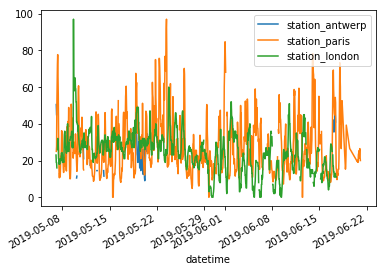

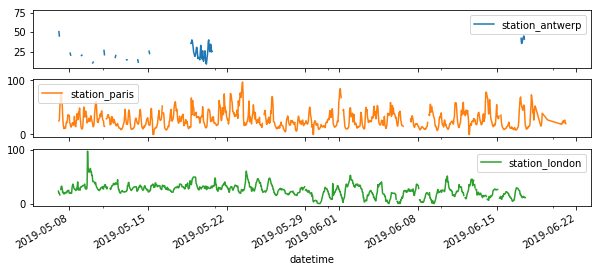

In [ ]:
air_quality.plot()
air_quality.plot(subplots=True, figsize=(10, 4))

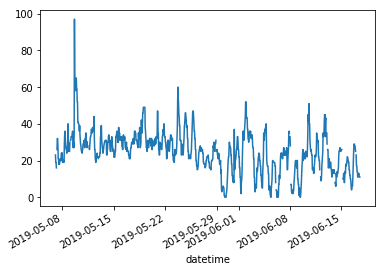

In [ ]:
air_quality.station_london.plot()

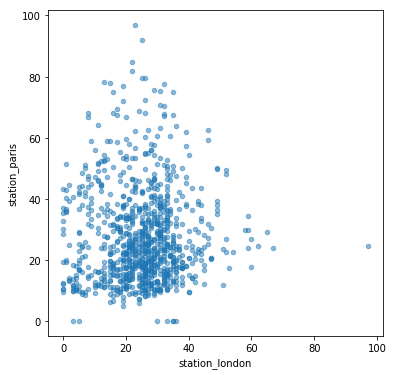

In [ ]:
air_quality.plot.scatter(
    x="station_london", y="station_paris",
    alpha=0.5, figsize=(6, 6))

In [ ]:
# available plot types
[method_name for method_name in dir(air_quality.plot)
 if not method_name.startswith("_")]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

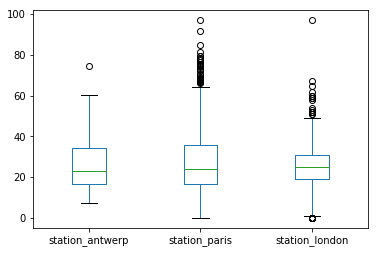

In [ ]:
air_quality.plot.box()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffba888e048>,
      dtype=object)

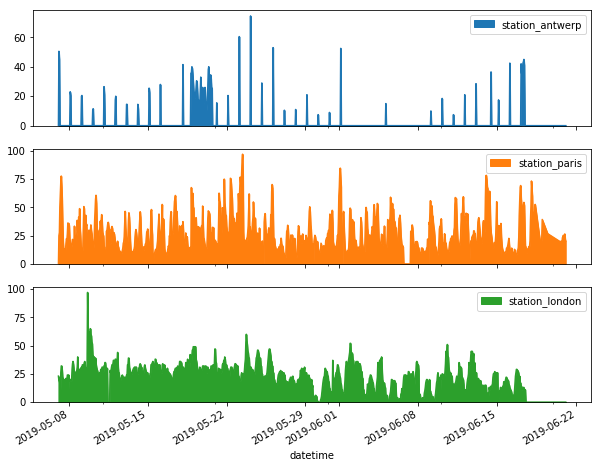

In [ ]:
air_quality.plot.area(figsize=(10, 8), subplots=True)

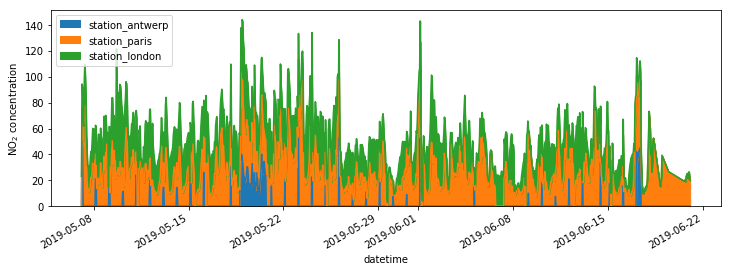

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
air_quality.plot.area(ax=ax)
ax.set_ylabel("NO$_2$ concentration")
fig.savefig("data/air_quality.png")

## Creating derived columns

In [ ]:
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


In [ ]:
air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882

In [ ]:
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic
datetime,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286
2019-05-07 03:00:00,50.5,25.0,19.0,35.758
2019-05-07 04:00:00,45.0,27.7,19.0,35.758
2019-05-07 05:00:00,NaN,50.4,16.0,30.112
2019-05-07 06:00:00,NaN,61.9,NaN,NaN


In [ ]:
air_quality["ratio_paris_antwerp"] = \
    air_quality["station_paris"] / air_quality["station_antwerp"]
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.4950
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.6156
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


## Renaming columns

In [ ]:
air_quality_renamed = air_quality.rename(
    columns={"station_antwerp": "BETR801",
             "station_paris": "FR04014",
             "station_london": "London Westminster"})
air_quality_renamed.head()

,BETR801,FR04014,London Westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.4950
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.6156
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


In [ ]:
air_quality_renamed = air_quality_renamed.rename(columns=str.lower)
air_quality_renamed.head()

,betr801,fr04014,london westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.4950
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.6156
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


## Stats, Aggregates, Grouping

https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,<NA>,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,<NA>,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,<NA>,S


### Aggregate stats

In [ ]:
titanic.Age.mean

<bound method Series.mean of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

In [ ]:
titanic[["Age", "Fare"]].median()

Age     28.0000
Fare    14.4542
dtype: float64

### Aggregates grouped by category

In [ ]:
titanic[["Sex", "Age"]].groupby("Sex").mean()

,Age
Sex,
female,27.9157
male,30.7266


In [ ]:
titanic.groupby("Sex").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.0287,0.7420,2.1592,27.9157,0.6943,0.6497,44.4798
male,454.1473,0.1889,2.3899,30.7266,0.4298,0.2357,25.5239


In [ ]:
# same as titanic[["Sex", "Age"]].groupby("Sex").mean()
# but this returns a series instead of a df
titanic.groupby("Sex")["Age"].mean()

Sex
female    27.9157
male      30.7266
Name: Age, dtype: float64

In [ ]:
# NOTE: this return a MultiIndex series
titanic.groupby(["Sex", "Pclass"]).Fare.mean()
# same as: titanic.groupby(["Sex", "Pclass"]).mean()["Fare"]
# ...but that would be waaay less efficient

Sex     Pclass
female  1         106.1258
        2          21.9701
        3          16.1188
male    1          67.2261
        2          19.7418
        3          12.6616
Name: Fare, dtype: float64

In [ ]:
# ...to get a df result (less efficient!) do this instead
titanic[["Sex", "Pclass", "Fare"]].groupby(["Sex", "Pclass"]).mean()

Fare
Sex    Pclass          
female 1       106.1258
       2        21.9701
       3        16.1188
male   1        67.2261
       2        19.7418
       3        12.6616

### Counts by category

In [ ]:
# exludes NaNs, use qith dropna=False to change this
titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: Int64

In [ ]:
# longer/explicit form of the above
titanic.groupby("Pclass")["Pclass"].count()
# exludes NaNs, use .size() instead of count to include them too

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

## Reshaping table layout

https://pandas.pydata.org/docs/getting_started/intro_tutorials/07_reshape_table_layout.html

In [ ]:
air_quality_long = pd.read_csv("data/air_quality_long.csv", index_col="date.utc", parse_dates=True)
display(air_quality_long)
air_quality_long.info()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³
...,...,...,...,...,...,...
2019-04-09 06:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³
2019-04-09 05:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³
2019-04-09 04:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5272 entries, 2019-06-18 06:00:00+00:00 to 2019-04-09 02:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       5272 non-null   object 
 1   country    5272 non-null   object 
 2   location   5272 non-null   object 
 3   parameter  5272 non-null   object 
 4   value      5272 non-null   float64
 5   unit       5272 non-null   object 
dtypes: float64(1), object(5)
memory usage: 288.3+ KB


### Sorting rows

In [ ]:
titanic.sort_values(by=['Pclass', 'Age'], ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,<NA>,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,<NA>,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,<NA>,Q
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,<NA>,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,<NA>,S


In [ ]:
# get just NO2 data
no2 = air_quality_long[air_quality_long["parameter"]  == "no2"]
no2

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...
2019-04-09 06:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³
2019-04-09 05:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³
2019-04-09 04:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³


In [ ]:
# get first (newest) 2 from each group
no2_subset = no2.sort_index(ascending=False).groupby(["location"]).head(2)
no2_subset

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-17 11:00:00+00:00,London,GB,London Westminster,no2,11.0,µg/m³
2019-06-17 10:00:00+00:00,London,GB,London Westminster,no2,11.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,no2,41.0,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,no2,45.0,µg/m³


### Pivot tables ("long to wide")
https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot

In [ ]:
# .pivot() if the "lightweight" pivot tables method
# - it does NOT support aggregation
no2_subset.pivot(columns="location", values="value")

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-06-17 07:00:00+00:00,45.0,NaN,NaN
2019-06-17 08:00:00+00:00,41.0,NaN,NaN
2019-06-17 10:00:00+00:00,NaN,NaN,11.0
2019-06-17 11:00:00+00:00,NaN,NaN,11.0
2019-06-20 23:00:00+00:00,NaN,21.8,NaN
2019-06-21 00:00:00+00:00,NaN,20.0,NaN


In [ ]:
# "proper" pivot table aggregating values would look like this:
#    (detailed in next section)
no2_subset.pivot_table(columns="location", values="value", aggfunc="mean")

location,BETR801,FR04014,London Westminster
value,43.0,20.9,11.0


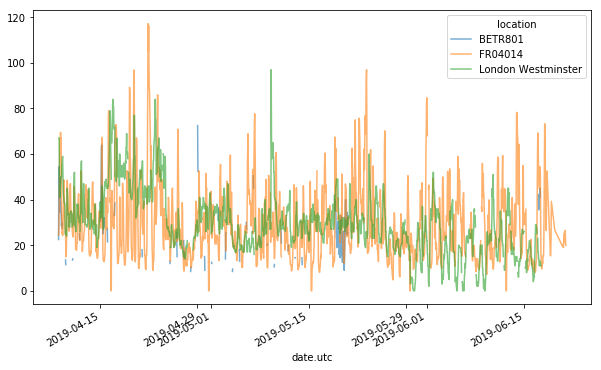

In [ ]:
# pivoting ("conversion from long to wide") allows
# easy plotting of time-series for locations
no2.pivot(columns="location", values="value").plot(figsize=(10, 6), alpha=0.6)

In [ ]:
# actual full-fledged pivot table
air_quality_long.pivot_table(
    values="value", index="location",
    columns="parameter", aggfunc="mean")

parameter,no2,pm25
location,,
BETR801,26.9509,23.1695
FR04014,29.3743,NaN
London Westminster,29.7400,13.4436


In [ ]:
# with extra summary columns
# actual full-fledged pivot table
air_quality_long.pivot_table(
    values="value", index="location",
    columns="parameter", aggfunc="mean",
    margins=True)

parameter,no2,pm25,All
location,,,
BETR801,26.9509,23.1695,24.9824
FR04014,29.3743,NaN,29.3743
London Westminster,29.7400,13.4436,21.4917
All,29.4303,14.3868,24.2227


### Pivot or Group-by
They can be used to obtian the same data, but result will be in different formats.

In [ ]:
air_quality_long.groupby(["parameter", "location"]).mean()

value
parameter location                   
no2       BETR801             26.9509
          FR04014             29.3743
          London Westminster  29.7400
pm25      BETR801             23.1695
          London Westminster  13.4436

### Melt columns ("wide to long")

In [ ]:
no2_pivoted = no2.pivot(columns="location", values="value").reset_index()
no2_pivoted.head()

location,date.utc,BETR801,FR04014,London Westminster
0,2019-04-09 01:00:00+00:00,22.5,24.4,NaN
1,2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2,2019-04-09 03:00:00+00:00,54.5,34.2,67.0
3,2019-04-09 04:00:00+00:00,34.5,48.5,41.0
4,2019-04-09 05:00:00+00:00,46.5,59.5,41.0


In [ ]:
# simple/implicit way to melt
# ("melts" all columns except from what's specified in id_vars)
no2_pivoted.melt(id_vars="date.utc").head()

,date.utc,location,value
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5


In [ ]:
# more explicit melt
no2_pivoted.melt(
    # what cols to keep:
    id_vars="date.utc",
    # define explicitly which columns to melt together:
    value_vars=["BETR801", "FR04014", "London Westminster"],
    # custom name for vlaue column:
    value_name="NO_2",
    # custom name for the col collecting column header names
    #    (otherwise it takes the index name or defaults to "variable"):
    var_name="id_location",
)

,date.utc,id_location,NO_2
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5
...,...,...,...
5110,2019-06-20 20:00:00+00:00,London Westminster,NaN
5111,2019-06-20 21:00:00+00:00,London Westminster,NaN
5112,2019-06-20 22:00:00+00:00,London Westminster,NaN
5113,2019-06-20 23:00:00+00:00,London Westminster,NaN


## Combining tables

In [ ]:
air_quality_no2 = pd.read_csv(
    "data/air_quality_no2_long.csv", parse_dates=["date.utc"]
).convert_dtypes()
display(air_quality_no2)
air_quality_no2.info()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   city       2068 non-null   string             
 1   country    2068 non-null   string             
 2   date.utc   2068 non-null   datetime64[ns, UTC]
 3   location   2068 non-null   string             
 4   parameter  2068 non-null   string             
 5   value      2068 non-null   float64            
 6   unit       2068 non-null   string             
dtypes: datetime64[ns, UTC](1), float64(1), string(5)
memory usage: 113.2 KB


In [ ]:
air_quality_pm25 = pd.read_csv(
    "data/air_quality_pm25_long.csv", parse_dates=["date.utc"]
).convert_dtypes()
display(air_quality_pm25)
air_quality_pm25.info()

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³
...,...,...,...,...,...,...,...
1105,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³
1106,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1107,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1108,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   city       1110 non-null   string             
 1   country    1110 non-null   string             
 2   date.utc   1110 non-null   datetime64[ns, UTC]
 3   location   1110 non-null   string             
 4   parameter  1110 non-null   string             
 5   value      1110 non-null   float64            
 6   unit       1110 non-null   string             
dtypes: datetime64[ns, UTC](1), float64(1), string(5)
memory usage: 60.8 KB


### Concatenating similarly structured tables

In [ ]:
air_qual = pd.concat([air_quality_pm25, air_quality_no2],
                     axis=0)  # axis=0 is default
air_qual.head()

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³


In [ ]:
air_qual.sort_values("date.utc").head()

,city,country,date.utc,location,parameter,value,unit
2067,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³
1003,Paris,FR,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,µg/m³
100,Antwerpen,BE,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5,µg/m³
1098,Antwerpen,BE,2019-05-07 01:00:00+00:00,BETR801,no2,50.5,µg/m³
1109,London,GB,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0,µg/m³


In [ ]:
air_qual2 = pd.concat([air_quality_pm25, air_quality_no2],
                      keys=["pm25", "no2"])
air_qual2.sort_values("date.utc").head()

city country                  date.utc            location  \
no2  2067     London      GB 2019-05-07 01:00:00+00:00  London Westminster   
     1003      Paris      FR 2019-05-07 01:00:00+00:00             FR04014   
pm25 100   Antwerpen      BE 2019-05-07 01:00:00+00:00             BETR801   
no2  1098  Antwerpen      BE 2019-05-07 01:00:00+00:00             BETR801   
pm25 1109     London      GB 2019-05-07 01:00:00+00:00  London Westminster   

          parameter  value   unit  
no2  2067       no2   23.0  µg/m³  
     1003       no2   25.0  µg/m³  
pm25 100       pm25   12.5  µg/m³  
no2  1098       no2   50.5  µg/m³  
pm25 1109      pm25    8.0  µg/m³

In [ ]:
# turning a hierarchical index into columns
air_qual2.reset_index().sort_values("date.utc").head()

,level_0,level_1,city,country,date.utc,location,parameter,value,unit
3177,no2,2067,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³
2113,no2,1003,Paris,FR,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,µg/m³
100,pm25,100,Antwerpen,BE,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5,µg/m³
2208,no2,1098,Antwerpen,BE,2019-05-07 01:00:00+00:00,BETR801,no2,50.5,µg/m³
1109,pm25,1109,London,GB,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0,µg/m³


### Joining (merging) tables

In [ ]:
stations_coord = pd.read_csv("data/air_quality_stations.csv")
stations_coord.head()

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.2362,4.3852
1,BELHB23,51.1703,4.3410
2,BELLD01,51.1100,5.0049
3,BELLD02,51.1204,5.0216
4,BELR833,51.3277,4.3623


In [ ]:
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.4950
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.6156
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


In [ ]:
air_quality = pd.merge(air_qual, stations_coord,
                       how='left', on='location')
air_quality.head()

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³,51.2097,4.4318
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³,51.2097,4.4318
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³,51.2097,4.4318
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³,51.2097,4.4318
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³,51.2097,4.4318


In [ ]:
air_quality_parameters = pd.read_csv("data/air_quality_parameters.csv").convert_dtypes()
air_quality_parameters.head()

,id,description,name
0,bc,Black Carbon,BC
1,co,Carbon Monoxide,CO
2,no2,Nitrogen Dioxide,NO2
3,o3,Ozone,O3
4,pm10,Particulate matter less than 10 micrometers in...,PM10


In [ ]:
air_quality = pd.merge(
    air_quality, air_quality_parameters,
    how='left', left_on='parameter', right_on='id')
air_quality.head()

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude,id,description,name
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³,51.2097,4.4318,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³,51.2097,4.4318,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³,51.2097,4.4318,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³,51.2097,4.4318,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³,51.2097,4.4318,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5


## Handling Time Series Data

https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html

https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries

### Get dates/datetimes in right format

In [ ]:
# V1: strait from thee beginning via read_csv
# NOTE: without index_col it doesn't seem to convert them either
air_quality = pd.read_csv(
    "data/air_quality_no2_long.csv",
    # INDEX can also be set at file read time
#     index_col="date.utc",
    parse_dates=["date.utc"], 
).convert_dtypes()
pp(air_quality.info())
air_quality.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   city       2068 non-null   string             
 1   country    2068 non-null   string             
 2   date.utc   2068 non-null   datetime64[ns, UTC]
 3   location   2068 non-null   string             
 4   parameter  2068 non-null   string             
 5   value      2068 non-null   float64            
 6   unit       2068 non-null   string             
dtypes: datetime64[ns, UTC](1), float64(1), string(5)
memory usage: 113.2 KB
None


,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [ ]:
# V2: "manually" after csv read
air_quality = pd.read_csv("data/air_quality_no2_long.csv")
air_quality = air_quality.rename(columns={"date.utc": "datetime"})
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])
pp(air_quality.info())
air_quality.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   city       2068 non-null   object             
 1   country    2068 non-null   object             
 2   datetime   2068 non-null   datetime64[ns, UTC]
 3   location   2068 non-null   object             
 4   parameter  2068 non-null   object             
 5   value      2068 non-null   float64            
 6   unit       2068 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 113.2+ KB
None


,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


#### Examples - why it's useful

In [ ]:
air_quality["datetime"].max() - air_quality["datetime"].min()

Timedelta('44 days 23:00:00')

In [ ]:
air_quality["month"] = air_quality["datetime"].dt.month
air_quality.head()

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6


In [ ]:
# average 𝑁𝑂2 concentration for each day of the week for each of the measurement locations
air_quality.groupby([
    air_quality["datetime"].dt.weekday,
    "location"
])["value"].mean()

datetime  location          
0         BETR801               27.8750
          FR04014               24.8563
          London Westminster    23.9697
1         BETR801               22.2143
          FR04014               30.9994
          London Westminster    24.8857
2         BETR801               21.1250
          FR04014               29.1658
          London Westminster    23.4604
3         BETR801               27.5000
          FR04014               28.6007
          London Westminster    24.7801
4         BETR801               28.4000
          FR04014               31.6180
          London Westminster    26.4468
5         BETR801               33.5000
          FR04014               25.2662
          London Westminster    24.9776
6         BETR801               21.8966
          FR04014               23.2743
          London Westminster    24.8592
Name: value, dtype: float64

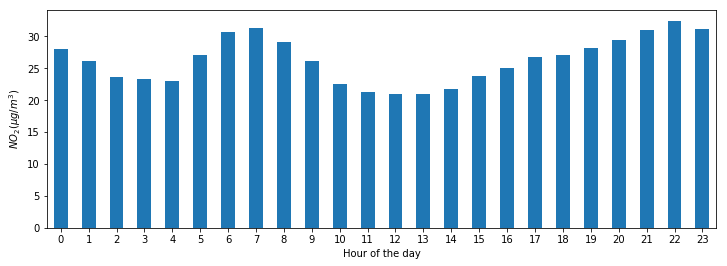

In [ ]:
# average value for each hour of the day
fig, ax = plt.subplots(figsize=(12, 4))

data = air_quality.groupby([
    air_quality["datetime"].dt.hour,
])["value"].mean()

# data.plot(kind='bar', rot=0, ax=ax)
data.plot.bar(rot=0, ax=ax)

plt.xlabel("Hour of the day")  # custom x label using matplotlib
plt.ylabel("$NO_2 (µg/m^3)$");

### Datetime as index

In [ ]:
# simply pick colum to be index
air_quality.set_index('datetime').head()

,city,country,location,parameter,value,unit,month
datetime,,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³,6
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³,6
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³,6
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³,6
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³,6


In [ ]:
# or do it as part of pivot
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")
no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


In [ ]:
# datetime properties on ndex ca be accesses wihtout .dt
no_2.index.year, no_2.index.weekday

(Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
             ...
             2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
            dtype='int64', name='datetime', length=1033),
 Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             ...
             3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
            dtype='int64', name='datetime', length=1033))

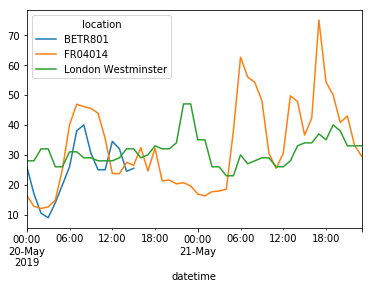

In [ ]:
# easy to plot a time interval with a datetime index
no_2["2019-05-20":"2019-05-21"].plot()

### Resampling

In [ ]:
# hourly -> monthly
monthly_max = no_2.resample("M").max()
monthly_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


In [ ]:
# When defined, the frequency of the time series is provided by the freq attribute:
monthly_max.index.freq

<MonthEnd>

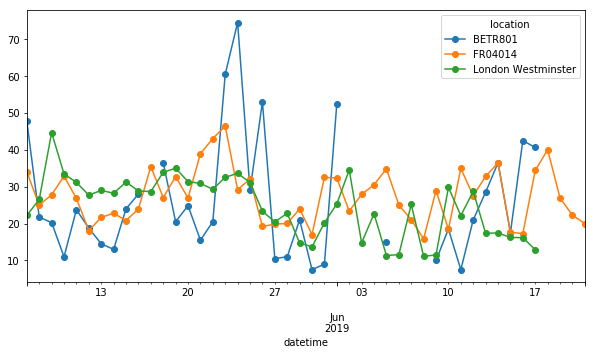

In [ ]:
# plot daily mean
no_2.resample("D").mean().plot(style="-o", figsize=(10, 5));

## Manipulating Text Data

https://pandas.pydata.org/docs/getting_started/intro_tutorials/10_text_data.html

https://pandas.pydata.org/docs/user_guide/text.html#working-with-text-data

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,<NA>,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,<NA>,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,<NA>,S


In [ ]:
titanic.Name.str.lower()

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: string

In [ ]:
titanic.Name.str.split(",")  # regexps also supported

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
                             ...                        
886                             [Montvila,  Rev. Juozas]
887                      [Graham,  Miss. Margaret Edith]
888          [Johnston,  Miss. Catherine Helen "Carrie"]
889                             [Behr,  Mr. Karl Howell]
890                               [Dooley,  Mr. Patrick]
Name: Name, Length: 891, dtype: object

In [ ]:
# to get a dataframe result
titanic.Name.str.split(r",\s*", expand=True)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry
...,...,...
886,Montvila,Rev. Juozas
887,Graham,Miss. Margaret Edith
888,Johnston,"Miss. Catherine Helen ""Carrie"""
889,Behr,Mr. Karl Howell


In [ ]:
titanic.Name.str.split(",").str.get(0)

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Name, Length: 891, dtype: object

In [ ]:
titanic.Name.str.split(",").str[1]  # "shortcut" for .get

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
886                                    Rev. Juozas
887                           Miss. Margaret Edith
888                 Miss. Catherine Helen "Carrie"
889                                Mr. Karl Howell
890                                    Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
titanic["Surname"] = titanic.Name.str.split(",").str.get(0)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,<NA>,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,<NA>,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,<NA>,S,Allen


In [ ]:
titanic[titanic["Name"].str.contains("Countess")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,Rothes


In [ ]:
# get longest passeenger name
titanic.loc[titanic["Name"].str.len().astype(int).idxmax(), "Name"]

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'

In [ ]:
titanic["Sex_short"] = titanic["Sex"]\
    .replace({"male": "M", "female": "F"})
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Sex_short
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,<NA>,S,Braund,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,F
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,<NA>,S,Heikkinen,F


## Categorical data [TODO]

https://pandas.pydata.org/docs/user_guide/categorical.html

### Creating categorical data

In [ ]:
# if we already ahve category codes and names
# 0 - train, 1 - test
train_test_cat_codes = np.random.choice([0, 1], 5, p=[0.5, 0.5])
pd.Series(pd.Categorical.from_codes(train_test_cat_codes, categories=["train", "test"]))

0     test
1     test
2    train
3     test
4    train
dtype: category
Categories (2, object): [train, test]

In [ ]:
# using dtype="category":
# - on Series creation
s = pd.Series(["a", "b", "c", "a"], dtype="category")
display(s)
print("=" * 50 + "\n")
# - on DF creation
# IMPORTANT: all is done column by column, each column is its own category
df = pd.DataFrame({'A': list('abca'), 'B': list('bccd')}, dtype="category")
display(df)
pp(df.A)
pp(df.B)

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): [a, b, c]

,A,B
0,a,b
1,b,c
2,c,c
3,a,d


0    a
1    b
2    c
3    a
Name: A, dtype: category
Categories (3, object): [a, b, c]
0    b
1    c
2    c
3    d
Name: B, dtype: category
Categories (3, object): [b, c, d]


In [ ]:
# by converting a column from a DF
df = pd.DataFrame({"A": ["a", "b", "c", "a"]})
df["B"] = df["A"].astype('category')
display(df)
pp(df.info())

,A,B
0,a,a
1,b,b
2,c,c
3,a,a


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   A       4 non-null      object  
 1   B       4 non-null      category
dtypes: category(1), object(1)
memory usage: 268.0+ bytes
None


In [ ]:
# by batch converting all columns in a DF
# IMPORTANT: all is done column by column, each column is its own category
df = pd.DataFrame({'A': list('abca'), 'B': list('bccd')})
df = df.astype('category')
df.dtypes

A    category
B    category
dtype: object

In [ ]:
# use .cut() to group data into discrete bins
#    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
df = pd.DataFrame({'value': np.random.randint(0, 100, 20)})
labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 100, 10)]
df['group'] = pd.cut(df.value, range(0, 101, 10), right=False, labels=labels)
df.head()

,value,group
0,66,60 - 69
1,36,30 - 39
2,57,50 - 59
3,8,0 - 9
4,85,80 - 89


In [ ]:
# using Categorical objects
raw_cat = pd.Categorical(["a", "b", "c", "a"], categories=["b", "c", "d"],
                         ordered=False)
print("> raw_cat:", raw_cat)
print("\n> pd.Series(raw_cat):", pd.Series(raw_cat))

df = pd.DataFrame({"A": ["a", "b", "c", "a"]})
df["B"] = raw_cat
display(df)
df.dtypes

> raw_cat: [NaN, b, c, NaN]
Categories (3, object): [b, c, d]

> pd.Series(raw_cat): 0    NaN
1      b
2      c
3    NaN
dtype: category
Categories (3, object): [b, c, d]


,A,B
0,a,NaN
1,b,b
2,c,c
3,a,NaN


A      object
B    category
dtype: object

### Fine control on categories creation

https://pandas.pydata.org/docs/user_guide/categorical.html#controlling-behavior
    
**TL;DR:** Use `CategoricalDtype(...)` with arguments instead of `"category"` for things like `.astype(..)`.

In [ ]:
from pandas.api.types import CategoricalDtype

In [ ]:
# usage for series
s = pd.Series(["a", "b", "c", "a"])
cat_type = CategoricalDtype(categories=["b", "c", "d"], ordered=True)
s.astype(cat_type)

0    NaN
1      b
2      c
3    NaN
dtype: category
Categories (3, object): [b < c < d]

In [ ]:
# usage for DF
# IMPORTANT: this way you CAN have consistent cats across DF
#    (...think when/if that's a good idea or not!)
df = pd.DataFrame({'A': list('abca'), 'B': list('bccd')})
cat_type = CategoricalDtype(categories=list("abcd"), ordered=True)
df_cat = df.astype(cat_type)
display(df_cat.A)
display(df_cat.B)
# categories are the same:
# (and yes, CategoricalDtype has sane equality semantics)
assert df_cat.A.dtype == df_cat.B.dtype

0    a
1    b
2    c
3    a
Name: A, dtype: category
Categories (4, object): [a < b < c < d]

0    b
1    c
2    c
3    d
Name: B, dtype: category
Categories (4, object): [a < b < c < d]

In [ ]:
# to automatically get categories for entire DF (or series)
categories = pd.unique(df.to_numpy().ravel())
cat_type = CategoricalDtype(categories=categories)
df.astype(categories)

,A,B
0,a,b
1,b,c
2,c,c
3,a,d


### Recovering original data

In [ ]:
s = pd.Series(["a", "b", "c", "a"], dtype="category")
display(s)
s2 = s.astype(str)
display(s2)

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): [a, b, c]

0    a
1    b
2    c
3    a
dtype: object

### Mutating categorical data

#### Change values in existing categories

In [ ]:
df = pd.DataFrame({'A': list('abca'), 'B': list('bccd')})
df = df.astype('category')
df

,A,B
0,a,b
1,b,c
2,c,c
3,a,d


In [ ]:
# change with value from same category
df.loc[2, 'B'] = 'd'
df

,A,B
0,a,b
1,b,c
2,c,d
3,a,d


In [ ]:
# change with None/NaN
df.loc[2, 'B'] = None
df

,A,B
0,a,b
1,b,c
2,c,NaN
3,a,d


#### Add categories to series/column

In [ ]:
df = pd.DataFrame({'A': list('abca'), 'B': list('bccd')})
df = df.astype('category')
df

,A,B
0,a,b
1,b,c
2,c,c
3,a,d


In [ ]:
# change with value previosuly not in categories
df.B.cat.add_categories(['x'], inplace=True)  # error without this!
df.loc[2, 'B'] = 'x'
df

,A,B
0,a,b
1,b,c
2,c,x
3,a,d


#### Remove categories

In [ ]:
df = pd.DataFrame({'A': list('abca'), 'B': list('bccd')})
df = df.astype('category')
df

,A,B
0,a,b
1,b,c
2,c,c
3,a,d


In [ ]:
df.A.cat.remove_categories(['c'], inplace=True)
# also see: .remove_unused_categories()
df

,A,B
0,a,b
1,b,c
2,NaN,c
3,a,d


#### Renaming categories

In [ ]:
df = pd.DataFrame({'A': list('abca'), 'B': list('bccd')})
df = df.astype('category')
df

,A,B
0,a,b
1,b,c
2,c,c
3,a,d


In [ ]:
df.A.cat.categories

Index(['a', 'b', 'c'], dtype='object')

In [ ]:
df.A.cat.rename_categories(['A', 'b', 'c'])

0    A
1    b
2    c
3    A
Name: A, dtype: category
Categories (3, object): [A, b, c]

#### Setting categories
This is just adding and removing categories in one step.

In [ ]:
df = pd.DataFrame({'A': list('abca'), 'B': list('bccd')})
df = df.astype('category')
df

,A,B
0,a,b
1,b,c
2,c,c
3,a,d


In [ ]:
df.A.cat.set_categories(['a', 'b', 'd'], inplace=True)
display(df)
df.A

,A,B
0,a,b
1,b,c
2,NaN,c
3,a,d


0      a
1      b
2    NaN
3      a
Name: A, dtype: category
Categories (3, object): [a, b, d]

#### Setting categories order

Use either:
- `reorder_categories()` - all old categories must be included in the new categories and no new categories are allowed
- `set_categories()` - also sets their order

This will necessarily make the sort order the same as the categories order.

In [ ]:
s = pd.Series([1, 2, 3, 1], dtype="category")
s = s.cat.reorder_categories([2, 3, 1], ordered=True)
s

0    1
1    2
2    3
3    1
dtype: category
Categories (3, int64): [2 < 3 < 1]

In [ ]:
s.sort_values()

1    2
2    3
0    1
3    1
dtype: category
Categories (3, int64): [2 < 3 < 1]

## Sorting/order

In [ ]:
df = pd.DataFrame({'A': list('abca'), 'B': list('bccd')})
df = df.astype('category')
df.A.cat.set_categories(['d', 'b', 'a'], inplace=True)
df

,A,B
0,a,b
1,b,c
2,NaN,c
3,a,d


In [ ]:
df.A.sort_values()

1      b
0      a
3      a
2    NaN
Name: A, dtype: category
Categories (3, object): [d, b, a]

In [ ]:
df.A.cat.as_ordered().sort_values()

1      b
0      a
3      a
2    NaN
Name: A, dtype: category
Categories (3, object): [d < b < a]

In [ ]:
df.A.astype('string').sort_values()

0       a
3       a
1       b
2    <NA>
Name: A, dtype: string